<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#EDA" data-toc-modified-id="EDA-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#Importing-Libraries" data-toc-modified-id="Importing-Libraries-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Importing Libraries</a></span></li><li><span><a href="#Load-Data-and-data-exploration" data-toc-modified-id="Load-Data-and-data-exploration-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Load Data and data exploration</a></span><ul class="toc-item"><li><span><a href="#Train-Data" data-toc-modified-id="Train-Data-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Train Data</a></span></li><li><span><a href="#Validation-Data" data-toc-modified-id="Validation-Data-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Validation Data</a></span></li><li><span><a href="#Test-Data" data-toc-modified-id="Test-Data-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Test Data</a></span></li><li><span><a href="#Data-preprocessing" data-toc-modified-id="Data-preprocessing-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>Data preprocessing</a></span></li><li><span><a href="#Checking-samples" data-toc-modified-id="Checking-samples-1.2.5"><span class="toc-item-num">1.2.5&nbsp;&nbsp;</span>Checking samples</a></span></li></ul></li></ul></li><li><span><a href="#CNN-Model-Architecture-and-Transfer-Learning" data-toc-modified-id="CNN-Model-Architecture-and-Transfer-Learning-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>CNN Model Architecture and Transfer Learning</a></span><ul class="toc-item"><li><span><a href="#Creating-functions" data-toc-modified-id="Creating-functions-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Creating functions</a></span></li></ul></li><li><span><a href="#Models" data-toc-modified-id="Models-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Models</a></span><ul class="toc-item"><li><span><a href="#Tuning-hyperparameters-and-trying-various-models" data-toc-modified-id="Tuning-hyperparameters-and-trying-various-models-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Tuning hyperparameters and trying various models</a></span><ul class="toc-item"><li><span><a href="#Choosing-best-learning-rate-without-dropout" data-toc-modified-id="Choosing-best-learning-rate-without-dropout-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Choosing best learning rate without dropout</a></span></li><li><span><a href="#Choosing-best-droprate" data-toc-modified-id="Choosing-best-droprate-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Choosing best droprate</a></span></li></ul></li></ul></li><li><span><a href="#Final-Model" data-toc-modified-id="Final-Model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Final Model</a></span><ul class="toc-item"><li><span><a href="#Train-large-299x299-model" data-toc-modified-id="Train-large-299x299-model-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Train large 299x299 model</a></span></li></ul></li></ul></div>

# EDA

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf
from tensorflow import keras

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

from tensorflow.keras.preprocessing import image
from keras_preprocessing.image import load_img
from keras_preprocessing.image import ImageDataGenerator
from keras import backend as K
from tensorboard import notebook

from tensorflow.keras.optimizers import SGD
from keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.models import Sequential
from keras.layers import Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

import tensorflow.keras.applications.xception as xc
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras_preprocessing.image import load_img

from tensorflow.keras.optimizers.schedules import ExponentialDecay
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
from tensorflow.keras.regularizers import l2
import sklearn
from sklearn.metrics import precision_recall_fscore_support, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from time import time

from PIL import Image
from typing import List
import random
import plotly.express as px
import collections
import os

tf.random.set_seed(0)
%matplotlib inline

In [2]:
print(f"pandas version  : {pd.__version__}")
print(f"numpy version   : {np.__version__}")
print(f"seaborn version : {sns.__version__}")
print(f"scikit-learn version  : {sklearn.__version__}")
print(f"tensorflow version  : {tf.__version__}")

pandas version  : 1.4.4
numpy version   : 1.21.5
seaborn version : 0.11.2
scikit-learn version  : 1.1.3
tensorflow version  : 2.9.1


In [3]:
# if gpu
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


## Load Data and data exploration

In [4]:
# Set paths
train_dir = './Images/train/'
val_dir = './Images/val/'
test_dir = './Images/test/'

knife


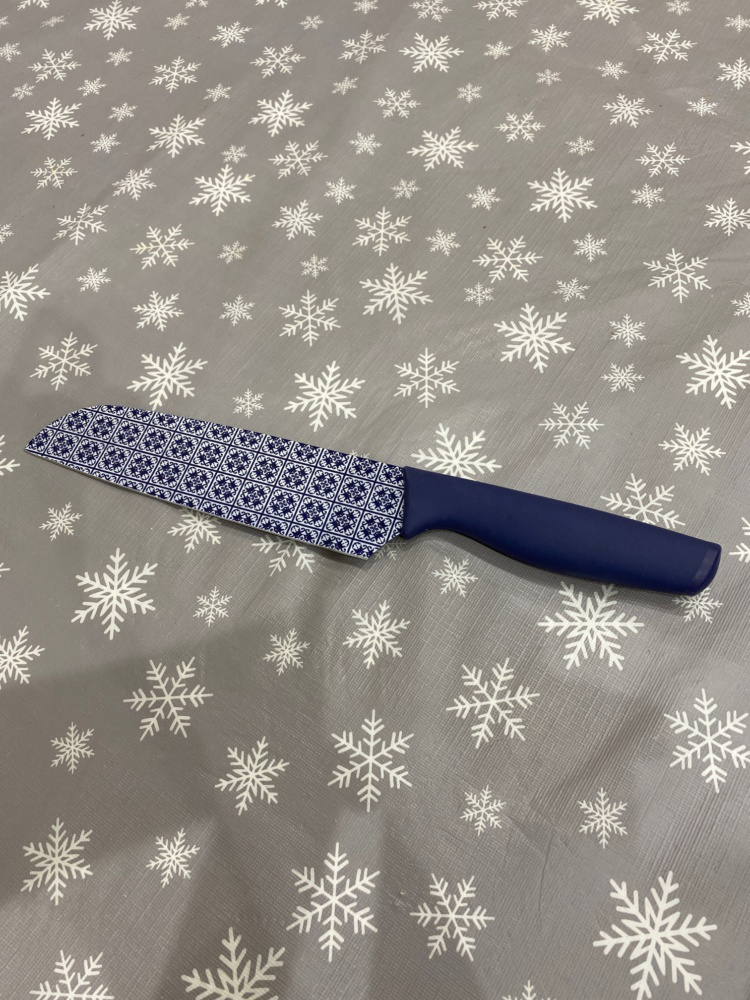

In [5]:
def get_random_label(path):
    # Get a list of all subdirectories in the specified path
    subdirectories = [
        d for d in os.listdir(path) if os.path.isdir(os.path.join(path, d))
    ]
    # Select a random subdirectory from the list
    label = random.choice(subdirectories)
    return label


# # Load an image
def get_random_name(path, extension):
    # Get a list of all files in the directory with the specified extension
    files = [f for f in os.listdir(path) if f.endswith(extension)]
    # Select a random file from the list
    name = random.choice(files)
    return name


# Example usage
label = get_random_label(train_dir)
print(label)
path = f'{train_dir}/{label}'
extension = '.jpg'
name = get_random_name(path, extension)
fullname = f'{path}/{name}'
load_img(fullname)

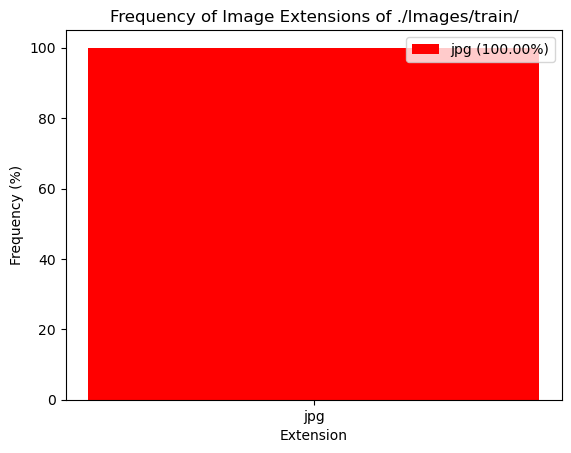

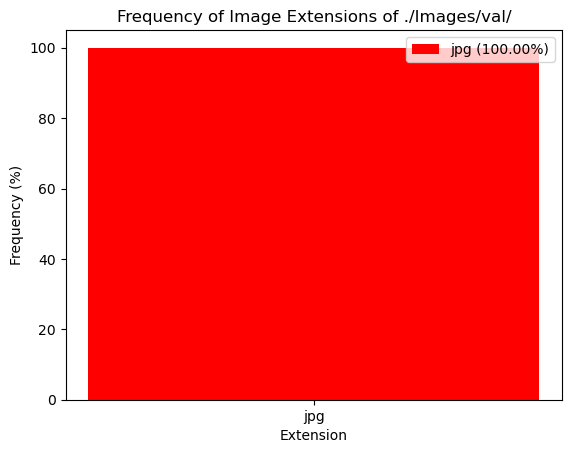

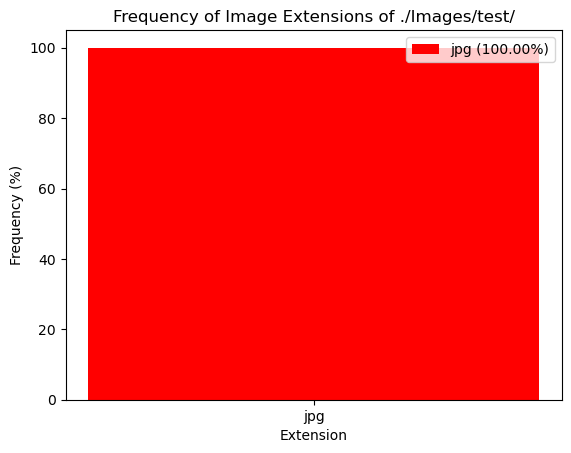

In [6]:
def plot_image_extension_frequency(path):
    # Initialize an empty list to store the extensions
    extensions = []

    # Iterate over the files and subfolders in the given path
    for root, dirs, files in os.walk(path):
        # Iterate over the files in the current folder
        for file in files:
            # Extract the extension of the file and add it to the list
            extension = os.path.splitext(file)[1][1:].lower()
            extensions.append(extension)

    # Count the frequency of each extension
    counter = collections.Counter(extensions)

    # Get the list of unique extensions
    unique_extensions = list(counter.keys())

    # Calculate the total number of files
    total_files = sum(counter.values())

    # Set the colors for the different extensions
    colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

    # Plot the percentage of each extension using matplotlib
    for i, extension in enumerate(unique_extensions):
        percentage = counter[extension] / total_files * 100
        plt.bar(extension,
                percentage,
                color=colors[i % len(colors)],
                label='{} ({:.2f}%)'.format(extension, percentage))
    plt.xlabel('Extension')
    plt.ylabel('Frequency (%)')
    plt.title('Frequency of Image Extensions of {}'.format(path))
    plt.legend()
    plt.show()


plot_image_extension_frequency(train_dir)
plot_image_extension_frequency(val_dir)
plot_image_extension_frequency(test_dir)

In [7]:
# The folder names are our Classes
class_names = sorted(os.listdir(train_dir))
n_classes = len(class_names)

print(f"Total Number of Classes : {n_classes}")
print(f"Classes : \n{class_names}")

Total Number of Classes : 6
Classes : 
['cup', 'fork', 'glass', 'knife', 'plate', 'spoon']


### Train Data

In [8]:
file_count = sum(len(files) for _, _, files in os.walk(train_dir))
print(file_count)

4447


In [9]:
train_class_dis = [len(os.listdir(train_dir + name)) for name in class_names]
train_class_dis

[908, 444, 597, 732, 986, 780]

In [10]:
fig = px.pie(names=class_names, values=train_class_dis)
fig.update_layout({'title': {'text': 'Class Distribution', 'x': 0.5}})
fig.show()

In [11]:
fig = px.bar(
    x=class_names,
    y=train_class_dis,
    title="Class Distribution",
)
fig.update_layout({'title': {'x': 0.5}})
fig.show()

### Validation Data

In [12]:
file_count = sum(len(files) for _, _, files in os.walk(val_dir))
print(file_count)

1112


In [13]:
val_class_dis = [len(os.listdir(val_dir + name)) for name in class_names]
val_class_dis

[227, 113, 145, 177, 241, 209]

In [14]:
fig = px.pie(names=class_names, values=val_class_dis)
fig.update_layout({'title': {'text': 'Class Distribution', 'x': 0.5}})
fig.show()

In [15]:
fig = px.bar(
    x=class_names,
    y=val_class_dis,
    title="Class Distribution",
)
fig.update_layout({'title': {'x': 0.5}})
fig.show()

### Test Data

In [16]:
file_count = sum(len(files) for _, _, files in os.walk(test_dir))
print(file_count)

3808


In [17]:
# test_class_dis = [len(os.listdir(test_dir + name)) for name in class_names]
# test_class_dis

In [18]:
# fig = px.pie(names=class_names, values=test_class_dis)
# fig.update_layout({'title': {'text': 'Class Distribution', 'x': 0.5}})
# fig.show()

In [19]:
# fig = px.bar(
#     x=class_names,
#     y=test_class_dis,
#     title="Class Distribution",
# )
# fig.update_layout({'title': {'x': 0.5}})
# fig.show()

In [20]:
num_epochs = 10
img_input = 150

input_shape = (img_input, img_input, 3)

learning_rate = 0.1
size_inner = 64
droprate = 0.2

### Data preprocessing

In [21]:
train_datagen = ImageDataGenerator(rotation_range=15,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest',
                                   width_shift_range=0.1,
                                   height_shift_range=0.1)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(img_input,
                                                                 img_input),
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    shuffle=True)

val_datagen = ImageDataGenerator(rotation_range=15,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True,
                                 fill_mode='nearest',
                                 width_shift_range=0.1,
                                 height_shift_range=0.1)

validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_input, img_input),
    batch_size=32,
    class_mode='categorical',
    shuffle=True)

#used later to evaluate best model
# test_datagen = ImageDataGenerator(rescale=1. / 255)

# test_generator = test_datagen.flow_from_directory(test_dir,
#                                                        target_size=(img_input,
#                                                                     img_input),
#                                                        batch_size=32,
#                                                        class_mode='input',
#                                                        shuffle=False)

Found 4447 images belonging to 6 classes.
Found 1112 images belonging to 6 classes.


In [22]:
# Get the list of classes from the train generator
class_names = list(train_generator.class_indices.keys())

# Choose a random class
random_class_name = random.choice(class_names)

### Checking samples

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


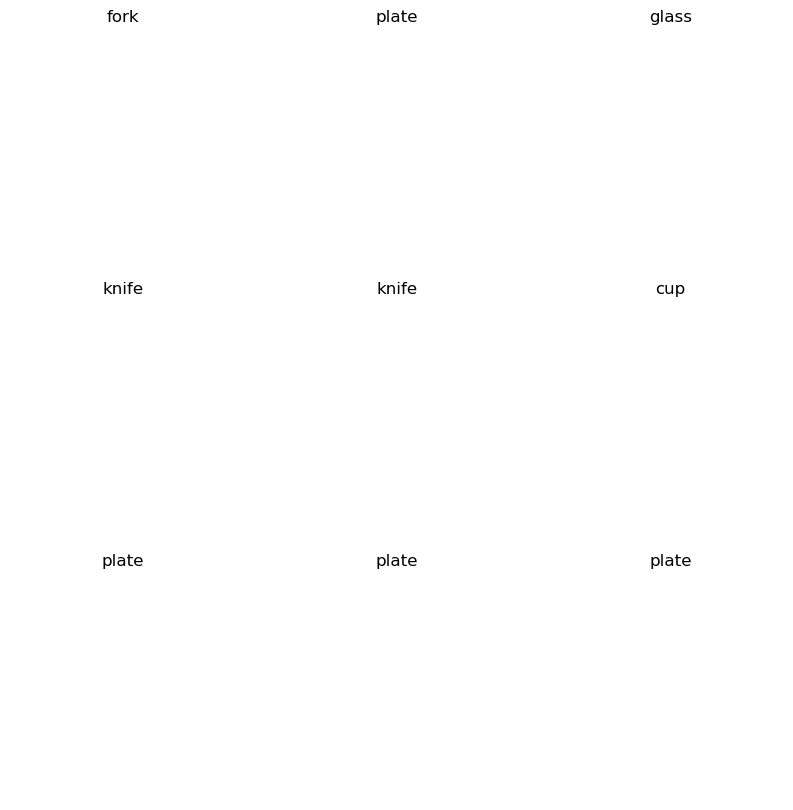

In [23]:
def disp_samples(generator, class_names):
    # Set the figure size to be 10x10
    fig = plt.figure(figsize=(10, 10))

    # Get the first batch of images and labels from the generator
    images, labels = next(iter(generator))

    # Convert the labels to integers
    labels = labels.astype(int)

    # Find the index of the maximum value in each row of the labels array
    label_indices = np.argmax(labels, axis=1)

    # Plot the first 9 images in the batch
    for i in range(9):
        # Create a subplot for the current image
        ax = fig.add_subplot(3, 3, i + 1)
        # Display the image
        plt.imshow(images[i])
        # Set the title of the subplot to be the class name
        plt.title(class_names[label_indices[i]])
        # Turn off the axis labels
        plt.axis("off")


# Display the images using the class names
disp_samples(validation_generator, class_names)

For Data Augmentation we just horizontally flip the image. One can use other options.

In [24]:
def show_augmented_images(directory, img_input, class_name):
    # Get the list of file names for the specified class
    class_directory = os.path.join(directory, class_name)
    fnames = [
        os.path.join(class_directory, fname)
        for fname in os.listdir(class_directory)
    ]

    # Choose a random file from the list of file names
    img_path = random.choice(fnames)

    # Load the image and convert it to a numpy array
    img = image.load_img(img_path, target_size=(img_input, img_input))
    x = image.img_to_array(img)

    # Reshape the array to make it compatible with the flow method
    x = x.reshape((1, ) + x.shape)

    # Generate and show the augmented images
    i = 0
    for batch in train_datagen.flow(x, batch_size=1):
        plt.figure(i)
        imgplot = plt.imshow(image.array_to_img(batch[0]))
        i += 1
        if i % 2 == 0:
            break
    plt.show()

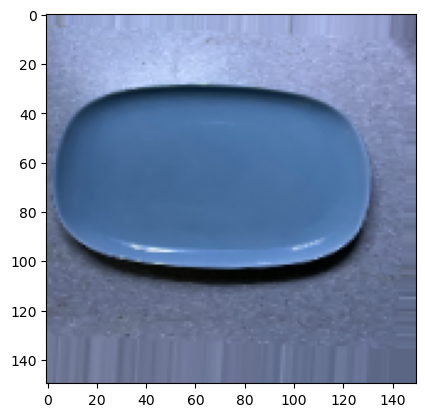

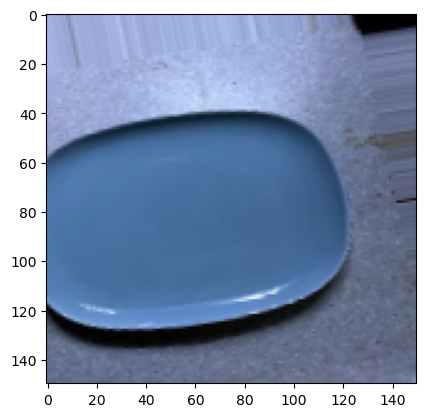

In [25]:
show_augmented_images(train_dir, img_input, random_class_name)

# CNN Model Architecture and Transfer Learning


## Creating functions

In [26]:
pre_trained_model = tf.keras.applications.EfficientNetB3

In [27]:
base_model = pre_trained_model(weights='imagenet',
                               include_top=False,
                               input_shape=input_shape)

In [28]:
def build_model(base_model, input_shape, droprate, learning_rate, size_inner,
                include_dropout):
    """
    Creates a model for image classification using a specified pre-trained model as a base model,
    with some additional inner layers and a final output layer.

    Parameters:
    - base_model: keras.Model
        The pre-trained model to use as the base model.
    - input_shape: tuple
        The shape of the input data (e.g. (150, 150, 3) for images with 150x150 resolution and 3 color channels).
    - learning_rate: float, optional
        The learning rate for the Adam optimizer.
    - size_inner: int, optional
        The number of units in the inner dense layer.
    - droprate: float, optional
        The dropout rate for the dropout layer.
    
    Returns:
    - model: keras.Model
        The compiled model.
    """

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=input_shape)

    base = base_model(inputs, training=False)

    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)

    if include_dropout:
        drop = keras.layers.Dropout(droprate)(inner)
        outputs = keras.layers.Dense(6, activation='softmax')(drop)
    else:
        outputs = keras.layers.Dense(6, activation='softmax')(inner)

    model = keras.Model(inputs, outputs)

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    #     loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    print(learning_rate)
    model.summary()
    return model

In [29]:
def checkpoint_weights(
    model_name: str = 'model',
    checkpoint_dir: str = 'checkpoints',
    log_dir: str = 'log_dir',
    delete_files: bool = True,
    restore_from_checkpoint: bool = False,
    callbacks: List[tf.keras.callbacks.Callback] = None
) -> List[tf.keras.callbacks.Callback]:
    """

        Creates a ModelCheckpoint and EarlyStopping callback for use during model training.

        The ModelCheckpoint callback saves the best model weights to a file with a name that includes the epoch number
        and the validation accuracy. The EarlyStopping callback stops the training if the validation accuracy does not
        improve after two epochs.

        If the delete_files flag is set to True, this function will delete all files in the checkpoint_dir directory
        that contain model_name in their names. If delete_files is not set or is set to False, this function will
        append an underscore and a number to the end of model_name if there are any files in the checkpoint_dir
        directory that contain model_name in their names, where the number is equal to the number of files in the
        directory.
        
        If the restore_from_checkpoint flag is set to True, this function will find the latest checkpoint file in the
    checkpoint_dir directory and load the model weights from it.

        Args:
            model_name: str, the name of the model.
            checkpoint_dir: str, the directory where the checkpoints will be saved.
            log_dir: str, the directory where the TensorBoard logs will be saved.
            delete_files: bool, flag to indicate whether to delete existing checkpoints.
            restore_from_checkpoint: bool, flag to indicate whether to restore the model weights from a checkpoint file.
            callbacks: List[tf.keras.callbacks.Callback], a list of callbacks to use during training. If this parameter
                   is not provided, the function will create the ModelCheckpoint, EarlyStopping, and TensorBoard
                   callbacks.
    
    Returns:
        List[tf.keras.callbacks.Callback], a list containing the ModelCheckpoint, EarlyStopping, and TensorBoard
        callbacks.
    """

    if callbacks is None:
        # Check if the checkpoint_dir directory exists and create it if it does not
        if not os.path.exists(checkpoint_dir):
            os.makedirs(checkpoint_dir)

        # Check if the log_dir directory exists and create it if it does not
        if not os.path.exists(log_dir):
            os.makedirs(log_dir)

        # If restore_from_checkpoint is True, find the latest checkpoint file in the checkpoint_dir directory
        # and load the model weights from it
        if restore_from_checkpoint:
            checkpoint_files = [
                f for f in os.listdir(checkpoint_dir) if model_name in f
            ]
            if checkpoint_files:
                latest_checkpoint = max(checkpoint_files, key=os.path.getctime)
                model.load_weights(
                    os.path.join(checkpoint_dir, latest_checkpoint))
        if delete_files:
            files = [f for f in os.listdir(checkpoint_dir) if model_name in f]
            for file in files:
                os.remove(os.path.join(checkpoint_dir, file))
        elif not delete_files:
            files = [f for f in os.listdir(checkpoint_dir) if model_name in f]
            if files:
                model_name = model_name + '_' + str(len(files))

        cp_callback = tf.keras.callbacks.ModelCheckpoint(
            os.path.join(
                checkpoint_dir,
                f'{model_name}-{{val_accuracy:.3f}}-{{epoch:02d}}.h5'),
            monitor='val_accuracy',
            save_best_only=True,
            mode='max')

        early_stopping = tf.keras.callbacks.EarlyStopping(
            monitor='val_accuracy', patience=2, restore_best_weights=True)

        tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

        callbacks = [cp_callback, early_stopping, tensorboard_callback]

    return callbacks

In [30]:
def train(rates, callbacks, epochs, input_shape, include_dropout):
    #########################################
    """
    Train and evaluate a model for multiple learning rates.
    
    Parameters:
    - learning_rates: list of float values
        List of learning rates to use for training the model.
    - checkpoint_weights: function
        Function to create a ModelCheckpoint callback for saving the model weights during training.
    - epochs: int
        Number of epochs to train the model.
    - input_shape: tuple
        Shape of the input data.
    - include_dropout: bool
        Indicates whether or not to include dropout layers in the model.
        
    Returns:
    - scores: dictionary
        Dictionary containing the training history for each learning rate. The keys of the dictionary are
        the learning rates and the values are the training history objects returned by the fit method.
    - model: tf.keras.Model
        Trained model with the best validation accuracy.
"""
    #########################################
    scores = {}

    # Compile model's training function into a static graph @tf.function
    def train_step(inputs, labels):
        """
        Perform a single training step.
        
        Parameters:
        - inputs: numpy array
            Input data for the training step.
        - labels: numpy array
            Labels for the input data.
        
        Returns:
        - loss_value: float
            The loss value resulting from the training step.
        """
        with tf.GradientTape() as tape:
            logits = model(inputs, training=True)
            loss_value = loss_fn(labels, logits)
        grads = tape.gradient(loss_value, model.trainable_variables)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))
        return loss_value

    for learning_rate in rates:
        for droprate in droprates:
            model = build_model(base_model, input_shape, droprate,
                                learning_rate, size_inner, include_dropout)

            # Use fit's steps_per_epoch argument to control the number of batches processed per epoch
            history = model.fit(train_generator,
                                epochs=num_epochs,
                                validation_data=validation_generator,
                                callbacks=callbacks,
                                steps_per_epoch=len(train_generator))
            hyperparameters = f'learning_rate={learning_rate}, droprate={droprate}'

            scores[hyperparameters] = history
    return scores, model

# Models

## Tuning hyperparameters and trying various models

### Choosing best learning rate without dropout

We run first for image size of 150x150

In [31]:
# num_epochs = 100
# img_input = 150

# input_shape = (img_input, img_input, 3)

# learning_rate = 0.1
# size_inner = 64
# droprate = 0.2

In [32]:
# rates = [1e-5, 1e-4, 1e-3, 1e-2]

# droprates = [0.0]
# # Create a ReduceLROnPlateau callback
# # lr_callback = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2)

# # Get the default callbacks from the checkpoint_weights function
# callbacks = checkpoint_weights()

# # Add the ReduceLROnPlateau callback to the list of callbacks
# # callbacks.append(lr_callback)

# scores, model = train(rates, callbacks, num_epochs, input_shape, False)

In [33]:
# def plot_metrics(history, label, max_epochs, fig_num):

#     lr, droprate = label.split(', ')
#     lr = float(lr.split('=')[1])
#     droprate = float(droprate.split('=')[1])
#     # Extract the history data
#     accuracy = history.history['accuracy']
#     val_accuracy = history.history['val_accuracy']

#     loss = history.history['loss']
#     val_loss = history.history['val_loss']

#     # Create the plot for accuracy
#     plt.subplot(2, 1, 1)
#     #     plt.figure()
#     plt.plot(accuracy, label=f'Training accuracy ({label})')
#     plt.plot(val_accuracy, label=f'Validation accuracy ({label})')
#     plt.ylabel('accuracy')
#     plt.xlabel('Epoch')
#     plt.title(f'Training and Validation accuracy')
#     plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
#     plt.xlim(0, max_epochs)
#     plt.ylim(0, 1)
#     plt.grid()
#     # Save the figure to a file
#     plt.savefig(f'accuracy_{fig_num}.png', bbox_inches='tight')

#     # Clear the figure
#     #     plt.clf()
#     # Create the plot for loss
#     plt.subplot(2, 1, 2)
#     #     plt.figure()
#     plt.plot(loss, label=f'Training Loss ({label})')
#     plt.plot(val_loss, label=f'Validation Loss ({label})')
#     plt.ylabel('Loss')
#     plt.xlabel('Epoch')
#     plt.title(f'Training and Validation Loss')
#     plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
#     plt.xlim(0, max_epochs)
#     plt.ylim(0, 1)
#     plt.grid()

#     # Save the figure to a file


# #     plt.savefig(f'loss_{fig_num}.png', bbox_inches='tight')

# # Find the maximum number of epochs
# max_epochs = max(
#     len(history.history['accuracy']) for history in scores.values())

# for i, (label, history) in enumerate(scores.items()):

#     # Plot the data
#     plot_metrics(history, label, max_epochs, i)

# # Show the figure
# plt.show()

We select learning_rate = 0.001 as the best one

### Choosing best droprate

In [34]:
rates = [0.001]

droprates = [0.0, 0.2, 0.5, 0.8]

# Get the default callbacks from the checkpoint_weights function
callbacks = checkpoint_weights()

scores, model = train(rates, callbacks, num_epochs, input_shape, True)

0.001
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 efficientnetb3 (Functional)  (None, 5, 5, 1536)       10783535  
                                                                 
 global_average_pooling2d (G  (None, 1536)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 64)                98368     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 6)                 390       
                                                       

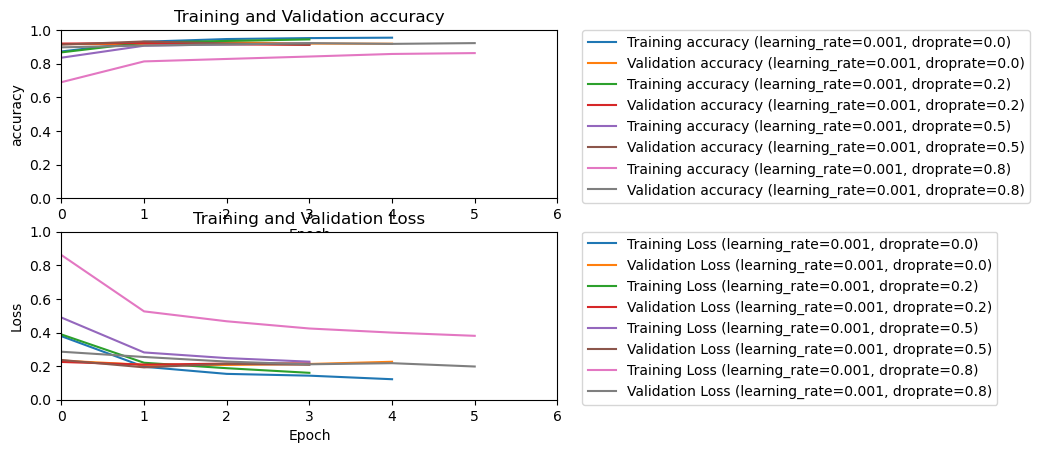

In [35]:
def plot_metrics(history, label, max_epochs, fig_num):

    lr, droprate = label.split(', ')
    lr = float(lr.split('=')[1])
    droprate = float(droprate.split('=')[1])
    # Extract the history data
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Create the plot for accuracy
    plt.subplot(2, 1, 1)
    #     plt.figure()
    plt.plot(accuracy, label=f'Training accuracy ({label})')
    plt.plot(val_accuracy, label=f'Validation accuracy ({label})')
    plt.ylabel('accuracy')
    plt.xlabel('Epoch')
    plt.title(f'Training and Validation accuracy')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    plt.xlim(0, max_epochs)
    plt.ylim(0, 1)
    plt.grid()
    # Save the figure to a file
    #     plt.savefig(f'accuracy_{fig_num}.png', bbox_inches='tight')

    # Clear the figure
    #     plt.clf()
    # Create the plot for loss
    plt.subplot(2, 1, 2)
    #     plt.figure()
    plt.plot(loss, label=f'Training Loss ({label})')
    plt.plot(val_loss, label=f'Validation Loss ({label})')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.title(f'Training and Validation Loss')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    plt.xlim(0, max_epochs)
    plt.ylim(0, 1)
    plt.grid()
    # Save the figure to a file
    plt.savefig(f'loss_{fig_num}.png', bbox_inches='tight')


# Find the maximum number of epochs
max_epochs = max(
    len(history.history['accuracy']) for history in scores.values())

for i, (label, history) in enumerate(scores.items()):

    # Plot the data
    plot_metrics(history, label, max_epochs, i)

# Show the figure
plt.show()

In [42]:
def plot_history(history, label=None):
    epochs = len(history.history['accuracy'])
    plt.plot(history.history['accuracy'], label=f'train:{label}')
    plt.plot(history.history['val_accuracy'], label=f'val:{label}')
    plt.xticks(np.arange(epochs))
    plt.legend()


def plot_scores(scores, ax=None):
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))
    for param, history in scores.items():
        epochs = len(history.history['accuracy'])
        ax[0].plot(history.history['accuracy'], label=f'train: {param}')
        ax[1].plot(history.history['val_accuracy'], label=f'val :{param}')
        ax[0].set_xticks(np.arange(epochs))
        ax[1].set_xticks(np.arange(epochs))
        ax[0].set_yticks(np.arange(0.6, 1.05, 0.05))
        ax[1].set_yticks(np.arange(0.85, 1.05, 0.05))

    ax[0].legend()
    ax[1].legend()

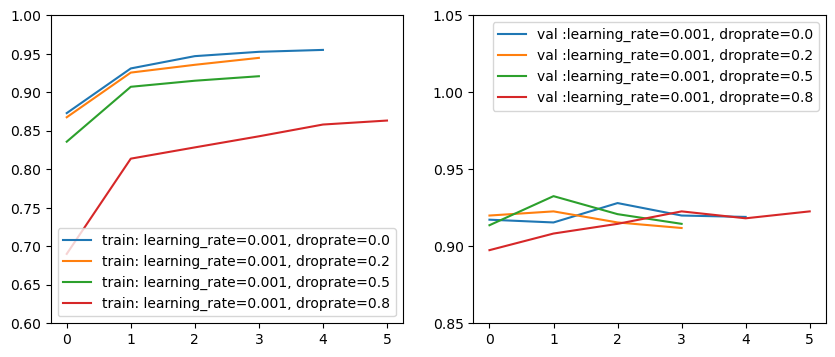

In [43]:
plot_scores(scores)

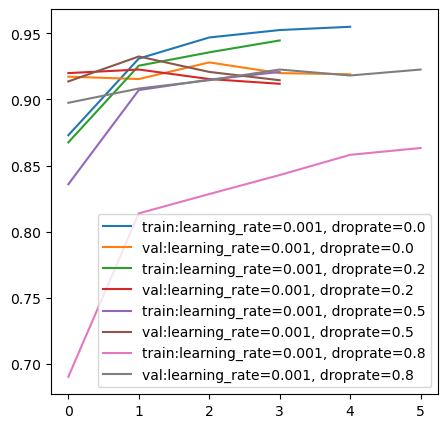

In [38]:
fig = plt.figure(figsize=(5, 5))
for lr, history in scores.items():
    plot_history(history, lr)

Let's select droprate = 0.2

In [39]:
grg

NameError: name 'grg' is not defined

# Final Model

## Train large 299x299 model

In [ ]:
num_epochs = 100
img_input = 299

input_shape = (img_input, img_input, 3)

learning_rate = 0.0001
size_inner = 64
droprate = 0.2

In [ ]:
train_datagen = ImageDataGenerator(rescale=1. / 255, horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(img_input,
                                                                 img_input),
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    shuffle=True)

val_datagen = ImageDataGenerator(rescale=1. / 255)

validation_generator = val_datagen.flow_from_directory(val_dir,
                                                       target_size=(img_input,
                                                                    img_input),
                                                       batch_size=32,
                                                       class_mode='categorical',
                                                       shuffle=True)

In [ ]:
show_augmented_images(train_dir, img_input, random_class_name)

In [ ]:
base_model = pre_trained_model(weights='imagenet',
                               include_top=False,
                               input_shape=input_shape)

In [ ]:
rates = [0.0001]

droprates = [0.2]

# Get the default callbacks from the checkpoint_weights function
callbacks = checkpoint_weights()

scores, model = train(rates, callbacks, num_epochs, input_shape, True)

In [ ]:
def plot_metrics(history, label, max_epochs, fig_num):

    lr, droprate = label.split(', ')
    lr = float(lr.split('=')[1])
    droprate = float(droprate.split('=')[1])
    # Extract the history data
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Create the plot for accuracy
    plt.subplot(2, 1, 1)
    #     plt.figure()
    plt.plot(accuracy, '-o', label=f'Training accuracy ({label})')
    plt.plot(val_accuracy, '-o', label=f'Validation accuracy ({label})')
    plt.ylabel('accuracy')
    plt.xlabel('Epoch')
    plt.title(f'Training and Validation accuracy')
    plt.legend()
    plt.xlim(0, max_epochs)
    plt.ylim(0, 1)
    plt.grid()
    # Save the figure to a file
    plt.savefig(f'accuracy_{fig_num}.png', bbox_inches='tight')

    # Clear the figure
    #     plt.clf()
    # Create the plot for loss
    plt.subplot(2, 1, 2)
    #     plt.figure()
    plt.plot(loss, '-o', label=f'Training Loss ({label})')
    plt.plot(val_loss, '-o', label=f'Validation Loss ({label})')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.title(f'Training and Validation Loss')
    plt.legend()
    #     plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    plt.xlim(0, max_epochs)
    plt.ylim(0, 1)
    plt.grid()
    # Save the figure to a file
    plt.savefig(f'loss_{fig_num}.png', bbox_inches='tight')


# Get the current figure
fig = plt.gcf()

# Get the current figure's size in inches
size = fig.get_size_inches()

# Set the figure's size to be dynamic
fig.set_size_inches(size * 2)

# Find the maximum number of epochs
max_epochs = max(
    len(history.history['accuracy']) for history in scores.values())

for i, (label, history) in enumerate(scores.items()):

    # Plot the data
    plot_metrics(history, label, max_epochs, i)

# Show the figure
plt.show()

In [ ]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(img_input,
                                                               img_input),
                                                  batch_size=32,
                                                  class_mode='binary',
                                                  shuffle=False)

In [ ]:
def evaluate_model(model, test_generator):
    # Make predictions on the test set
    y_pred = model.predict(test_generator)
    y_true = test_generator.labels

    # Convert the continuous labels to binary labels
    y_pred = np.where(y_pred > 0.5, 1, 0)
    y_true = np.where(y_true > 0.5, 1, 0)

    # Compute the test accuracy
    test_acc = accuracy_score(y_true, y_pred)

    # Count the number of test examples and the number of correctly classified test examples
    num_test_examples = test_generator.n
    #  num_correct = sum(y_true == y_pred)

    num_correctly_classified = test_acc * num_test_examples
    # Start the timer
    start_time = time()

    # Evaluate the model
    model.evaluate(test_generator)

    # Stop the timer
    end_time = time()

    # Print the evaluation results
    print("  Evaluation results:")
    print("  Number of test examples: {}".format(num_test_examples))
    print("  Number of correctly classified test examples: {}".format(
        num_correctly_classified))
    print("  Number of incorrectly classified test examples: {}".format(
        num_test_examples - num_correctly_classified))
    print("  Test accuracy: {:.2f}%".format(test_acc * 100))

    # Compute the performance metrics
    precision, recall, f1, _ = precision_recall_fscore_support(y_true,
                                                               y_pred,
                                                               average='micro')
    print("  Precision: {:.2f}%".format(precision * 100))
    print("  Recall: {:.2f}%".format(recall * 100))
    print("  F1: {:.2f}%".format(f1 * 100))
    print("  Time taken to evaluate the model: {:.2f} seconds".format(
        end_time - start_time))

    # Print the classification report
    print(classification_report(y_true, y_pred))

    # Plot the confusion matrix
    confusion = confusion_matrix(y_true, y_pred)
    sns.heatmap(confusion, annot=True, fmt="d")
    plt.show()

In [ ]:
evaluate_model(model, test_generator)

In [ ]:
# Find the best model
checkpoint_dir = './checkpoints'
model_name = 'model'

# List all files in the checkpoint_dir directory
files = [f for f in os.listdir(checkpoint_dir) if model_name in f]

# Extract the accuracy values from the file names
accuracies = [float(f.split('-')[1]) for f in files]

# Find the maximum accuracy value
best_accuracy = max(accuracies)

# Find the index of the file with the best accuracy value
best_index = accuracies.index(best_accuracy)

# Get the name of the best model file
best_model = files[best_index]

# Load the best model using the load_model function
best_model = keras.models.load_model(os.path.join(checkpoint_dir, best_model))

In [ ]:
# Convert the best model to a TensorFlow Lite model
converter = tf.lite.TFLiteConverter.from_keras_model(best_model)
model_lite = converter.convert()
with open('model.tflite', 'wb') as f_out:
    f_out.write(model_lite)

In [ ]:
evaluate_model(best_model, test_generator)